# Comparing classifier hyperplates by visualising the Test set results

## Classifier examples: 
## - SVM with rbf and linear kernel
## - Adaboost
## - KNN
## - Random forest

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('sample_gender_data.csv') 
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [2]:
# Handling Missing Values

# Note: 
# Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. 
# Import impute.SimpleImputer from sklearn instead.

from sklearn.impute import SimpleImputer #class
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') # an instance of the class with these properties
imputer = imputer.fit(X[:, 0:2])         # we have to choose the columns with missing values
X[:, 0:2] = imputer.transform(X[:, 0:2])           # replace the X values for the columns averages

# Splitting the dataset into the Training set and Test set

# Note: 
# sklearn.cross_validation is now changed to sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)  
                     # random_state -> random, but a fixed random.
    


# Feature Scaling
#from sklearn.preprocessing import StandardScaler # x_stand = (x-mean(x))/std(x)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# =============================================================================
from sklearn.preprocessing import MinMaxScaler # Normalization x_norm = (x- min(x))/(max(x)-min(x))
sc = MinMaxScaler(feature_range=(0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# =============================================================================

"""
End of data processing part.
"""

'\nEnd of data processing part.\n'

In [3]:

# Fitting SVM classifier to the Training set
from sklearn.svm import SVC # this is a class

# Case 1: SVM rbf kernel

classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [4]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.68
Precision: [0.77272727 0.60714286]
Recall: [0.60714286 0.77272727]
F-score: [0.68 0.68]
Support: [28 22]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


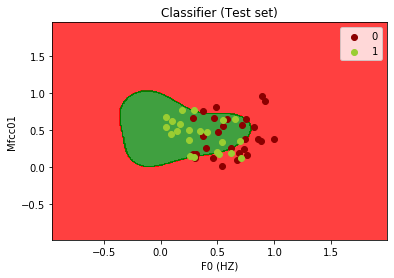

In [5]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'yellowgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()



In [6]:
# Case 2: SVM linear kernel

classifier = SVC(kernel = 'linear', random_state = 0) 
classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Metrics
precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.68
Precision: [0.77272727 0.60714286]
Recall: [0.60714286 0.77272727]
F-score: [0.68 0.68]
Support: [28 22]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


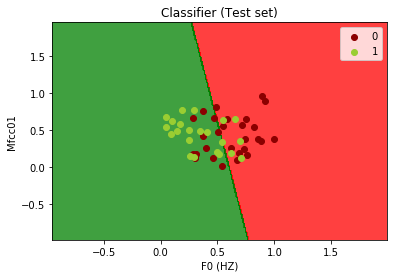

In [7]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'yellowgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()

In [8]:
# Case 3: Adaboost

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=10
) # interesting to try it out with different number of estimators
classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Metrics
precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.72
Precision: [0.79166667 0.65384615]
Recall: [0.67857143 0.77272727]
F-score: [0.73076923 0.70833333]
Support: [28 22]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


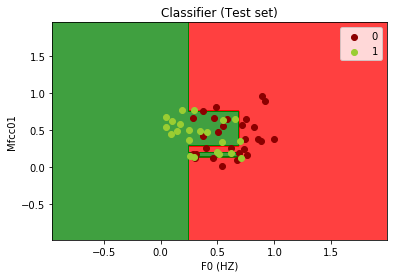

In [9]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'yellowgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()

In [10]:
# Case 3: KNN

from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Metrics
precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.7
Precision: [0.76 0.64]
Recall: [0.67857143 0.72727273]
F-score: [0.71698113 0.68085106]
Support: [28 22]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


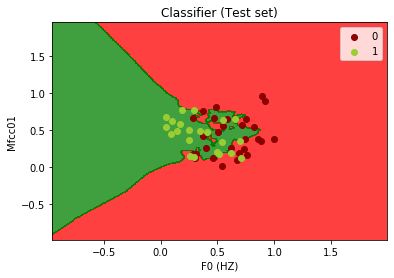

In [11]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'yellowgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()

In [12]:
# Case 3: Random forrest 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)    # This practically compels Xs with y-ones

# Predicting the Test set results
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Metrics
precision, recall, fscore, support = score(y_test, y_pred)

print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F-score: {}'.format(fscore))
print('Support: {}'.format(support))

Accuracy: 0.72
Precision: [0.88888889 0.625     ]
Recall: [0.57142857 0.90909091]
F-score: [0.69565217 0.74074074]
Support: [28 22]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


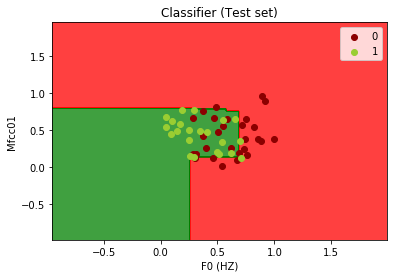

In [13]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('darkred', 'yellowgreen'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('F0 (HZ)')
plt.ylabel('Mfcc01')
plt.legend()
plt.show()